

# Taller: Análisis de Hipótesis con Datos de la ENS 2016-2017



## 1. Introducción



En investigación cuantitativa, la docimacia de hipótesis (o prueba de hipótesis) permite evaluar si las diferencias observadas en los datos pueden atribuirse al azar o reflejan patrones reales en la población. Este taller tiene como objetivo introducir herramientas estadísticas para comprobar hipótesis en datos reales, utilizando Python como herramienta de análisis.



A partir de la Encuesta Nacional de Salud (ENS) 2016-2017, trabajaremos con variables demográficas, biométricas y clínicas para:

- Verificar supuestos de normalidad.

- Comparar variables entre grupos (por ejemplo, hombres vs. mujeres).

- Analizar diferencias en variables continuas y categóricas.



Este análisis es clave para evaluar desigualdades en salud, diseñar políticas basadas en evidencia y generar conclusiones confiables a partir de datos poblacionales.



## 2. Objetivos

Al finalizar este taller, los y las estudiantes serán capaces de:



* Evaluar la normalidad de variables cuantitativas

- Verificar normalidad en variables como Edad, Peso, Talla, Glicemia y Colesterol.

* Comparar variables continuas entre grupos

- Aplicar pruebas t de Student para muestras independientes (hombres vs. mujeres).

- Comparar variables como Peso, IMC, y Glicemia por sexo.

* Comparar variables categóricas u ordinales

- Evaluar diferencias en número de comorbilidades o nivel educacional entre grupos.

- Utilizar pruebas como chi-cuadrado o pruebas no paramétricas.

* Interpretar resultados

- Comprender el significado de los valores p.

- Formular y contrastar hipótesis nula y alternativa.

- Traducir los resultados estadísticos en hallazgos interpretables en contexto de salud pública.



## 3. Dataset



La Encuesta Nacional de Salud (ENS) 2016-2017 es un estudio representativo de la población chilena que recopila datos sobre salud física y mental, factores de riesgo, estilo de vida y uso de servicios sanitarios. Esta información permite caracterizar el estado de salud y sus determinantes a nivel nacional.En este taller trabajaremos con un subconjunto de variables relevantes para el análisis estadístico de hipótesis. Los datos son de acceso público y están disponibles en este repositorio. A través de este conjunto de datos, aprenderemos a aplicar pruebas estadísticas clásicas sobre variables reales, extrayendo conclusiones aplicables a la investigación en salud pública. Los datos se encuentran [disponibles públicamente](https://data.mendeley.com/datasets/3myh3nzcy3/1).

<div style="text-align:center;">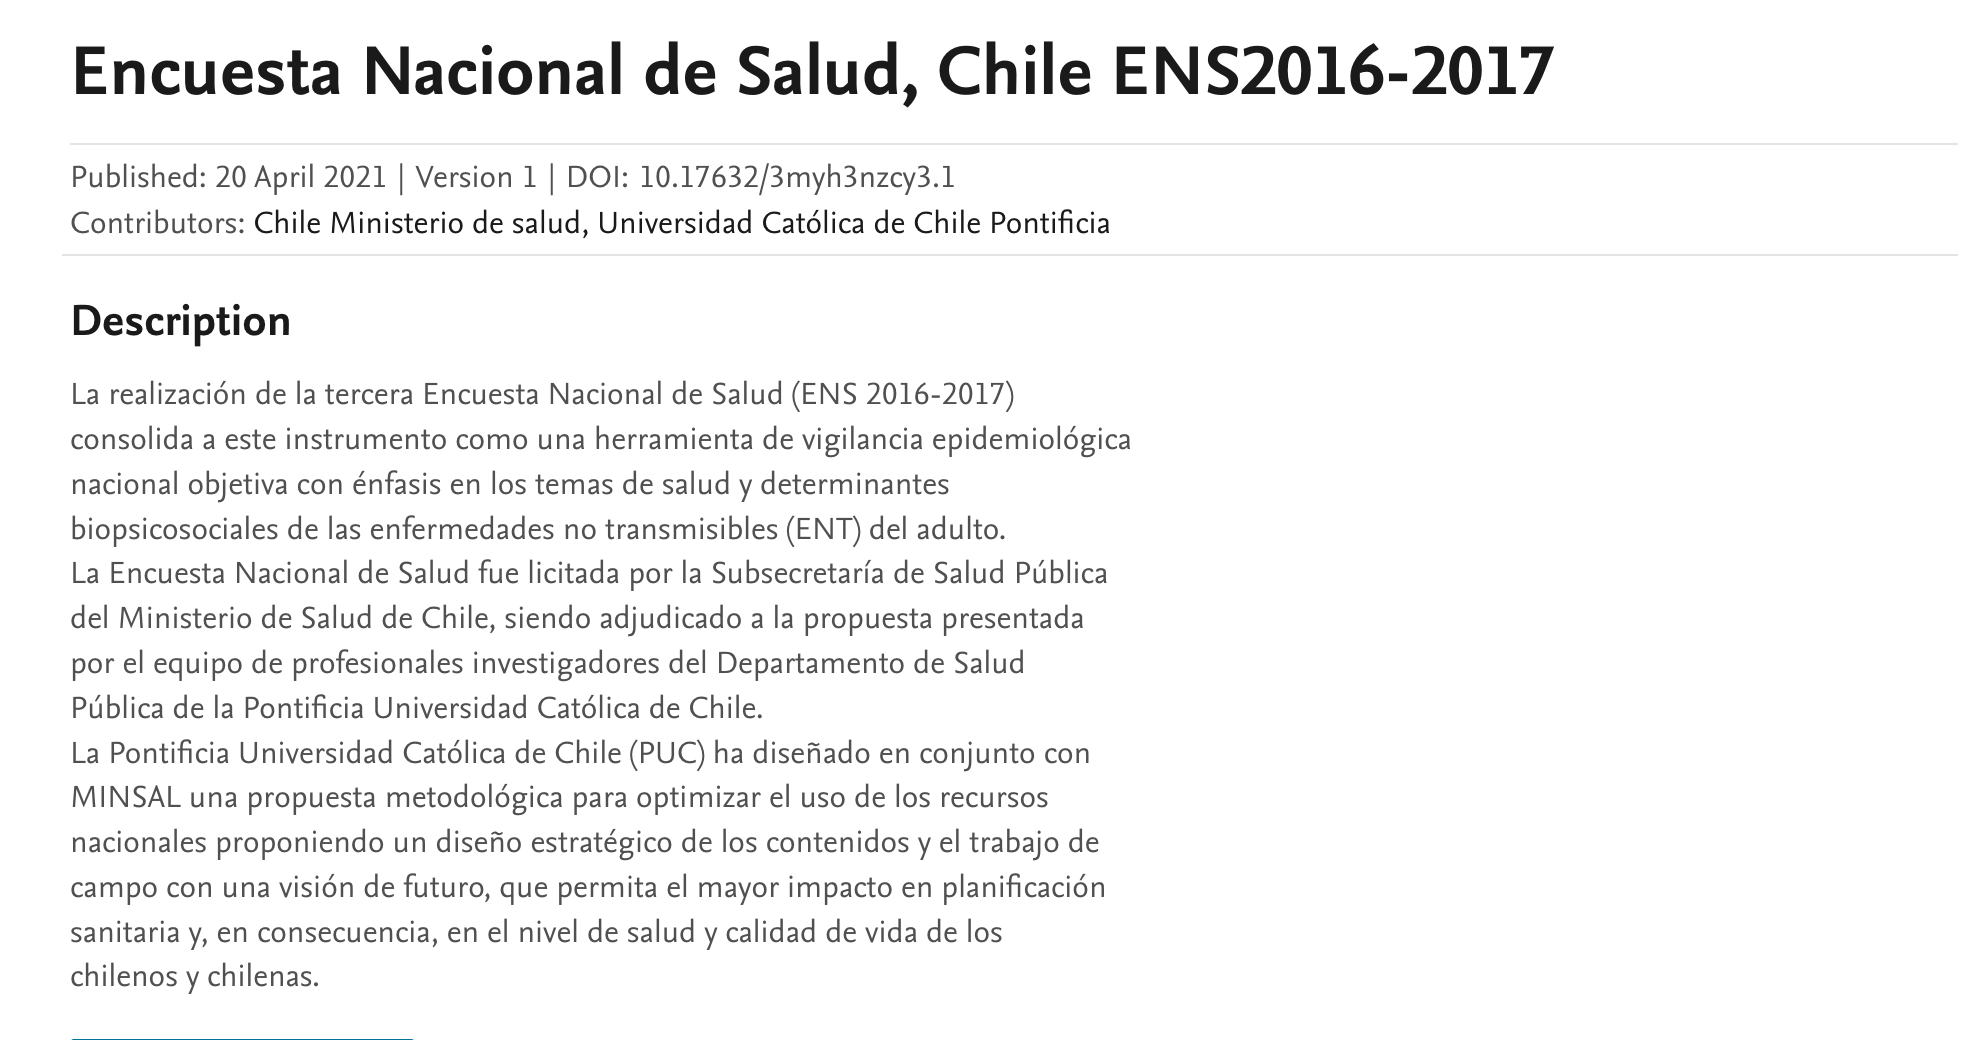</div>


### 3.1 Librerías necesarias
Las siguientes librerias son necesarias para el análisis de datos y visualización. 

In [2]:
%%capture
# Instalar librerias para leer archivos SPSS
!pip install pyreadstat

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

### 3.2 Cargar Datos

Tal como se realizo en el taller anterior, se descargara la base de datos utilizando `wget` y luego se cargara la base de datos en la variable `ens` utilizando la función de pandas `read_spss`.  

In [4]:
# Descargar ENS
!wget https://github.com/iHealthInstitute/Talleres_Diplomado_iHealth/raw/refs/heads/main/data/ENS2016-2017.sav

--2025-07-16 10:05:20--  https://github.com/iHealthInstitute/Talleres_Diplomado_iHealth/raw/refs/heads/main/data/ENS2016-2017.sav
Resolviendo github.com (github.com)... 20.201.28.151
Conectando con github.com (github.com)[20.201.28.151]:443... conectado.
Petición HTTP enviada, esperando respuesta... 302 Found
Localización: https://raw.githubusercontent.com/iHealthInstitute/Talleres_Diplomado_iHealth/refs/heads/main/data/ENS2016-2017.sav [siguiendo]
--2025-07-16 10:05:21--  https://raw.githubusercontent.com/iHealthInstitute/Talleres_Diplomado_iHealth/refs/heads/main/data/ENS2016-2017.sav
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.111.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 34441286 (33M) [application/octet-stream]
Grabando a: «ENS2016-2017.sav.4»

ENS2016-2017.sav.4  100%[==============

In [5]:
ens = pd.read_spss('ENS2016-2017.sav')
print(ens.head())
print(ens.shape)

   IdEncuesta  FechaInicioF1               Region    Comuna    Zona  \
0     20006.0   1.369894e+10  XIII. Metropolitana  Santiago  URBANA   
1     20008.0   1.369964e+10  XIII. Metropolitana  Santiago  URBANA   
2     20011.0   1.369955e+10  XIII. Metropolitana  Santiago  URBANA   
3     20012.0   1.369903e+10  XIII. Metropolitana  Santiago  URBANA   
4     20013.0   1.369902e+10  XIII. Metropolitana  Santiago  URBANA   

   IdSegmento  IdPersona_1      Ident7  Edad Edad_Codificada  ...  \
0  13101101.0        241.0  1977-12-18  38.0         25 - 44  ...   
1  13101101.0        197.0  1991-10-23  25.0         25 - 44  ...   
2  13101102.0        321.0  1996-05-31  20.0           15-24  ...   
3  13101102.0        245.0  1931-04-14  85.0             65+  ...   
4  13101102.0        242.0  1975-06-24  41.0         25 - 44  ...   

  fg_CKDschwartz_diminuido_60 fg_CKDschwartz_diminuido_30 Fechaini_F1  \
0                         NaN                         NaN  2016-11-19   
1           

## 4 Test de normalidad

En estadística inferencial, muchas de las pruebas más utilizadas —como la t de Student, el ANOVA y los intervalos de confianza— se basan en un supuesto fundamental: que las variables que analizamos siguen una distribución normal (también llamada distribución gaussiana o de campana). Este supuesto afecta directamente la validez de los resultados.

Verificar la normalidad nos permite:
* Determinar si podemos aplicar pruebas paramétricas, que suelen ser más potentes y precisas.
* Evitar errores al interpretar p-valores o al calcular promedios y desviaciones estándar.
* Decidir si necesitamos transformar los datos o usar pruebas no paramétricas alternativas (como Mann-Whitney o Kruskal-Wallis).

La forma tipica de una variable que distribute normal se puede observar en la siguiente figura:

![](img/normal_dist.png)

Es de mucha utilidad visualizar los datos mediante su histograma para entender el comportamiento de estos.


#### **Ejercicio 1** 

Utiliza histogramas para comprar la normalidad de las variables: `edad`, `Colesterol_HDL`, `Glucosa`, `IMC` y `Microalbuminuria_Creatinina`. Crea un plot para cada variable modificando la cantidad de bins segun sea necesario. Responde:
* ¿Que variables parecen distribuir normal?
* ¿Que sucede en variables como la creatinina?
* En base solo a los histogramas, ¿Podemos asegurar normalidad de los datos?





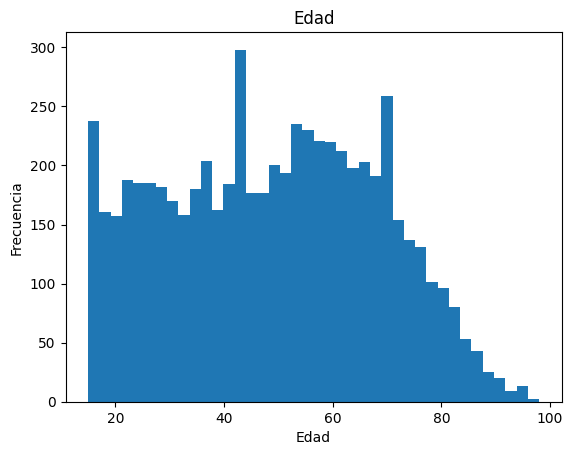

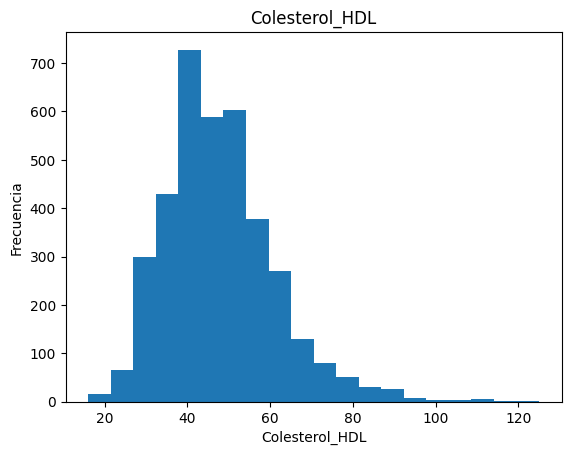

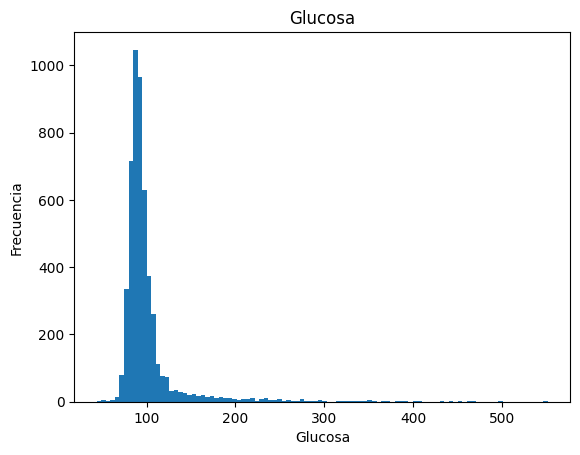

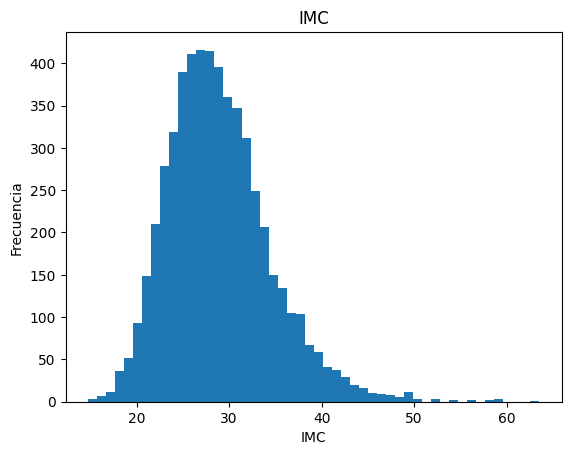

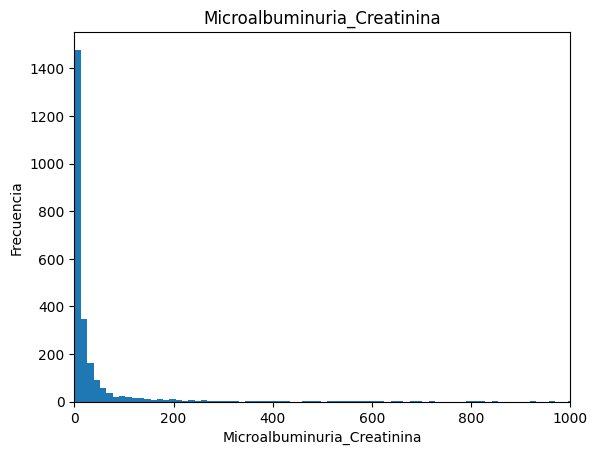

In [6]:
# <CODE>
variables = ['Edad', 'Colesterol_HDL', 'Glucosa', 'IMC', 'Microalbuminuria_Creatinina']

v = 'Edad'
fig = plt.figure()
plt.hist(ens[v],bins=40)
plt.title(v)
plt.xlabel(v)
plt.ylabel('Frecuencia')
plt.show()

v = 'Colesterol_HDL'
fig = plt.figure()
plt.hist(ens[v],bins=20)
plt.title(v)
plt.xlabel(v)
plt.ylabel('Frecuencia')
plt.show()

v = 'Glucosa'
fig = plt.figure()
plt.hist(ens[v],bins=100)
plt.title(v)
plt.xlabel(v)
plt.ylabel('Frecuencia')
plt.show()

v = 'IMC'
fig = plt.figure()
plt.hist(ens[v],bins=50)
plt.title(v)
plt.xlabel(v)
plt.ylabel('Frecuencia')
plt.show()

v = 'Microalbuminuria_Creatinina'
fig = plt.figure()
plt.hist(ens[v],bins=1000)
plt.title(v)
plt.xlabel(v)
plt.ylabel('Frecuencia')
plt.xlim([0, 1000])
plt.show()




Para evaluar si la variable distribuye normal, es necesario realize un test de hipotesis para verificar su distribución. Gran parte (si es que no todos) de los metodos para realizar test de hipotesis se encuentran implementados en Python. 

#### **Ejercicio 2** 

Utilizando el test de `Shapiro-Wilk` verifique si las variables antes mencionadas distribuyen normal. Debera buscar en internet que función puede utilizar para realizar el test. Recuerde mencionar si se rechaza o acepta la hipotesis nula (pvalue >0.05). Responda:

* De acuerdo a este resultado, ¿que variables distribuyen normal?



In [7]:
# <CODE>
from scipy.stats import shapiro


variables = ['Edad', 'Colesterol_HDL', 'Glucosa', 'IMC', 'Microalbuminuria_Creatinina']

for var in variables:
    stat, p = shapiro(ens[var].dropna())
    print(f'{var}: p={p} -> {"Normal" if p > 0.05 else "No normal"}')

Edad: p=1.6908373537795317e-32 -> No normal
Colesterol_HDL: p=7.142251582699447e-32 -> No normal
Glucosa: p=2.0695278415097308e-80 -> No normal
IMC: p=2.6034048901686587e-35 -> No normal
Microalbuminuria_Creatinina: p=1.4025837534342824e-74 -> No normal


/opt/anaconda3/envs/diplomado/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6233.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/envs/diplomado/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5117.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/envs/diplomado/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5483.
  res = hypotest_fun_out(*samples, **kwds)


#### **Ejercicio 3** 

Realize un Q-Q para cada una de las variables y analize que sucede en los extremos de este. Responda:
* ¿Que nos indican los resultados del plot?


In [8]:
# <CODE>

variables = ['Edad', 'Colesterol_HDL', 'Glucosa', 'IMC', 'Microalbuminuria_Creatinina']

for var in variables:
    plt.figure(figsize=(6, 4))
    stats.probplot(ens[var].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q plot de {var}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

NameError: name 'stats' is not defined

<Figure size 600x400 with 0 Axes>

## 4.1 Teorema del limite central (TLC)
El Teorema del Límite Central (TLC) es uno de los conceptos más fundamentales y poderosos de la estadística. Nos dice que:

> Si tomamos muchas muestras aleatorias de una población (de cualquier forma), y calculamos la media de cada muestra, esas medias estarán aproximadamente distribuidas normalmente, independientemente de la forma de la distribución original, siempre que el tamaño de la muestra sea suficientemente grande.

En otras palabras, incluso si los datos originales son sesgados, asimétricos o contienen valores atípicos, la distribución de las medias muestrales se vuelve cada vez más parecida a una campana (distribución normal) a medida que aumenta el tamaño de las muestras. Este fenómeno es clave porque permite aplicar técnicas estadísticas basadas en la normalidad, como intervalos de confianza o pruebas t, aun cuando la variable original no sea normal.



#### **Ejercicio 4** 

Utilizando las mismas variables antes trabajadas (Edad, Colesterol_HDL, Glucosa, IMC, Microalbuminuria_Creatinina), verifica si es posible obtener distribuciones normales mediante el Teorema del Límite Central.
Para esto, debes:
1. Realizar sampling aleatorio de la variable original, extrayendo muestras de tamaño 5, 10 y 30. HINT: utiliza la función `sample` de pandas.
2. Repetir este proceso 500 veces.
3. Formar un nuevo vector con las medias de cada muestra simulada.
4. Evaluar si ese vector distribuye normal:
    * Aplicar prueba de Shapiro-Wilk.
    * Graficar un Q-Q plot.

Responda:
* 	¿Qué ocurre con la normalidad de las medias al aumentar el tamaño de la muestra? ¿Como afecta al valor p?
* 	¿Alguna variable requiere un n mayor para aproximarse a la normalidad?
*	¿En qué casos visualmente el Q-Q plot parece normal, pero el p-valor de Shapiro dice que no?

In [ ]:
# <CODE> 1. Sampling aleatorio y 2. repetir proceso 1000 veces

def simular_medias(data, sample_size=30, n_iter=500):
    data = data.dropna()
    medias = []
    for _ in range(n_iter):
        muestra = data.sample(sample_size, replace=True)
        medias.append(muestra.mean())
    return np.array(medias)

Variable: Edad
  Tamaño muestral: 10
    Shapiro-Wilk p=0.1076 → ✅ Normal


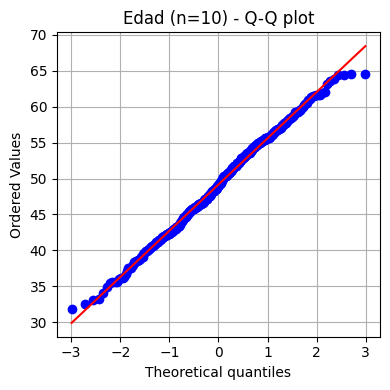

  Tamaño muestral: 30
    Shapiro-Wilk p=0.6739 → ✅ Normal


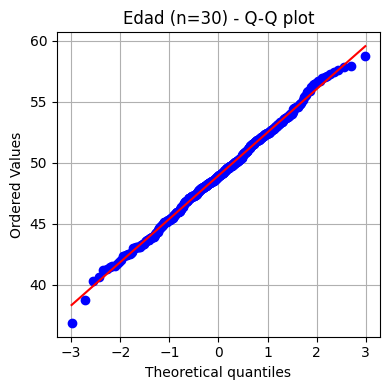

  Tamaño muestral: 50
    Shapiro-Wilk p=0.2698 → ✅ Normal


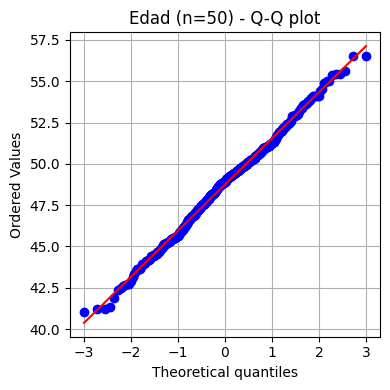

  Tamaño muestral: 100
    Shapiro-Wilk p=0.6194 → ✅ Normal


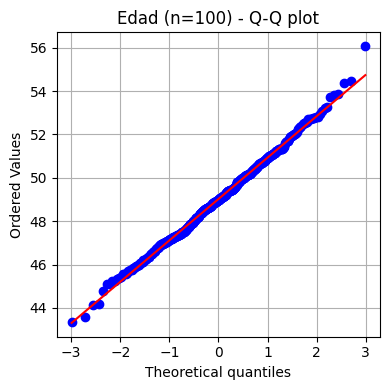

Variable: Colesterol_HDL
  Tamaño muestral: 10
    Shapiro-Wilk p=0.0044 → ❌ No normal


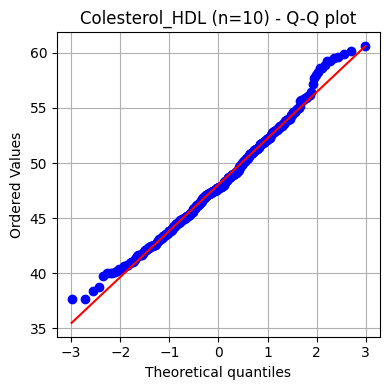

  Tamaño muestral: 30
    Shapiro-Wilk p=0.4407 → ✅ Normal


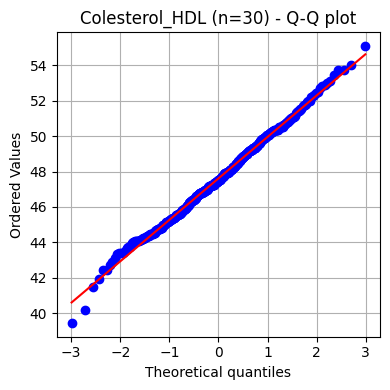

  Tamaño muestral: 50
    Shapiro-Wilk p=0.0334 → ❌ No normal


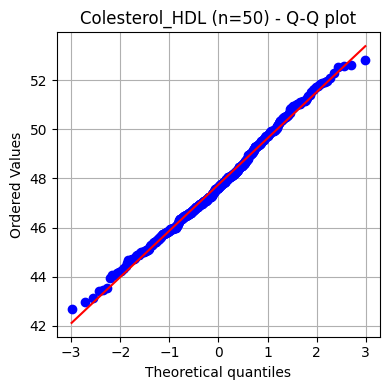

  Tamaño muestral: 100
    Shapiro-Wilk p=0.1555 → ✅ Normal


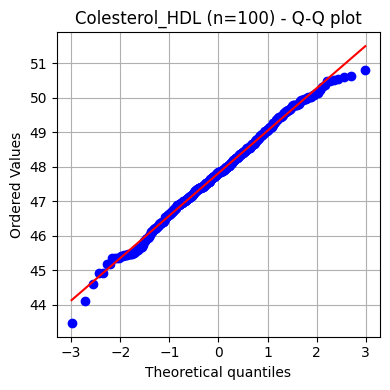

Variable: Glucosa
  Tamaño muestral: 10
    Shapiro-Wilk p=0.0000 → ❌ No normal


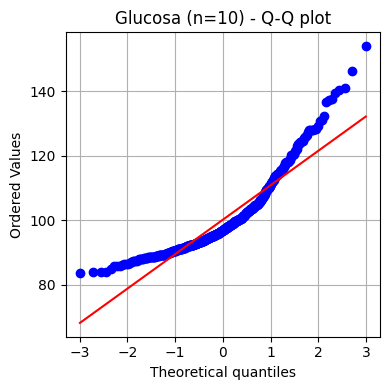

  Tamaño muestral: 30
    Shapiro-Wilk p=0.0000 → ❌ No normal


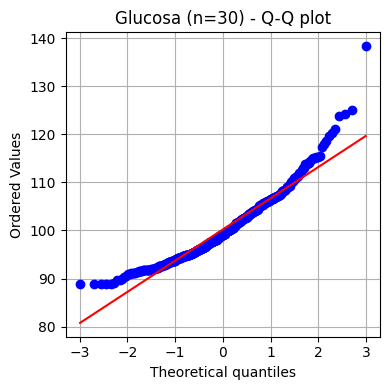

  Tamaño muestral: 50
    Shapiro-Wilk p=0.0000 → ❌ No normal


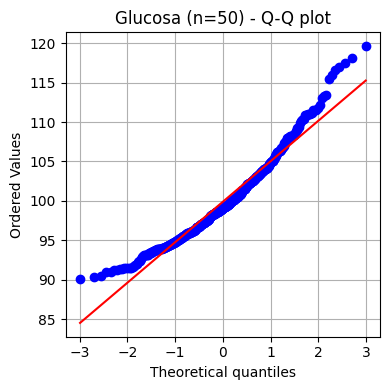

  Tamaño muestral: 100
    Shapiro-Wilk p=0.0090 → ❌ No normal


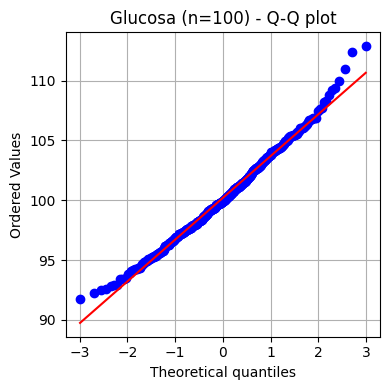

Variable: IMC
  Tamaño muestral: 10
    Shapiro-Wilk p=0.0124 → ❌ No normal


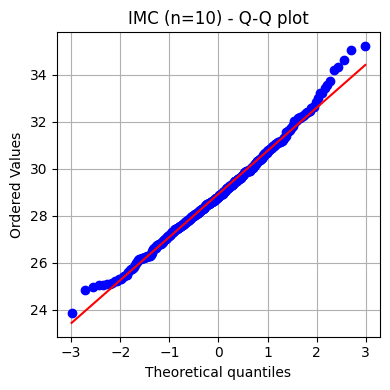

  Tamaño muestral: 30
    Shapiro-Wilk p=0.4154 → ✅ Normal


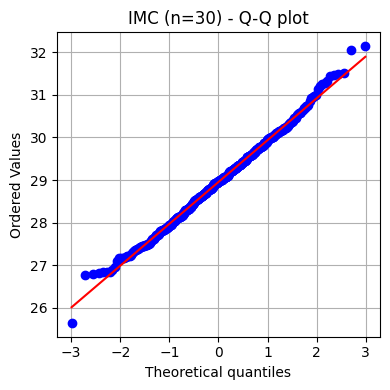

  Tamaño muestral: 50
    Shapiro-Wilk p=0.2197 → ✅ Normal


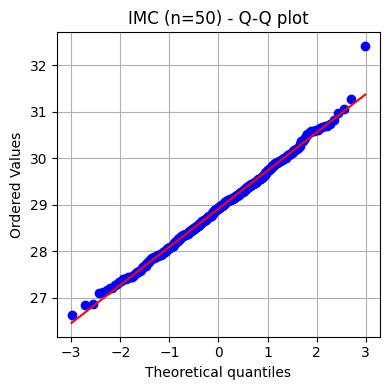

  Tamaño muestral: 100
    Shapiro-Wilk p=0.4160 → ✅ Normal


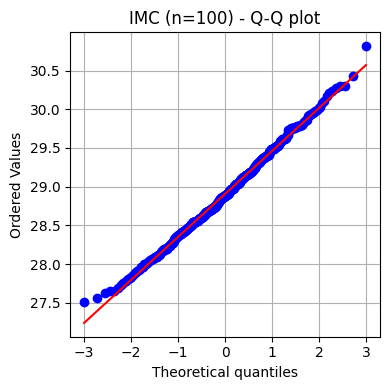

Variable: Microalbuminuria_Creatinina
  Tamaño muestral: 10
    Shapiro-Wilk p=0.0000 → ❌ No normal


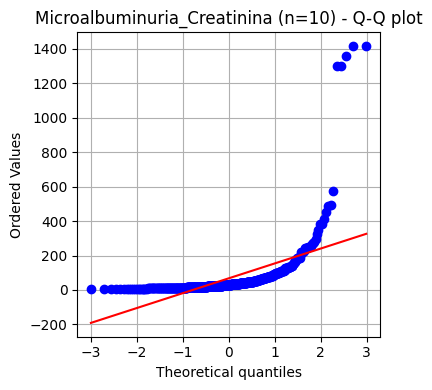

  Tamaño muestral: 30
    Shapiro-Wilk p=0.0000 → ❌ No normal


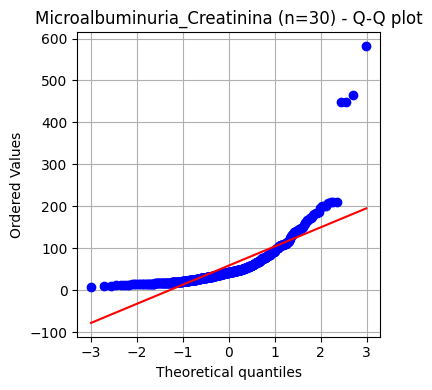

  Tamaño muestral: 50
    Shapiro-Wilk p=0.0000 → ❌ No normal


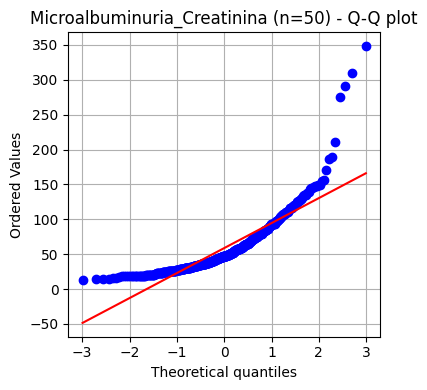

  Tamaño muestral: 100
    Shapiro-Wilk p=0.0000 → ❌ No normal


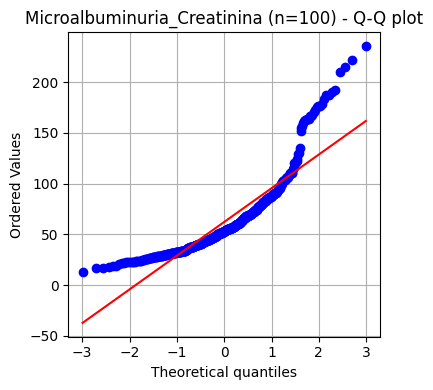

In [ ]:
# <CODE> 3. Formar nuevo vector

variables = ['Edad', 'Colesterol_HDL', 'Glucosa', 'IMC', 'Microalbuminuria_Creatinina']
tamaños = [10, 30, 50, 100]

for var in variables:
    print("="*20)
    print(f"Variable: {var}")
    
    for n in tamaños:
        print(f"  Tamaño muestral: {n}")
        medias = simular_medias(ens[var], sample_size=n)
        
        # Test de normalidad Shapiro-Wilk
        stat, p = shapiro(medias)
        resultado = "✅ Normal" if p > 0.05 else "❌ No normal"
        print(f"    Shapiro-Wilk p={p:.4f} → {resultado}")
        
        # Q-Q plot
        plt.figure(figsize=(4, 4))
        stats.probplot(medias, dist="norm", plot=plt)
        plt.title(f"{var} (n={n}) - Q-Q plot")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


## 4.2 Comparación entre grupos (variables continuas)

En esta sección aplicaremos pruebas estadísticas para comparar grupos en relación con variables continuas, como el peso, IMC, glicemia o colesterol. Estas comparaciones nos permiten evaluar si existen diferencias significativas entre grupos, por ejemplo:

* ¿Tienen las mujeres un IMC promedio diferente al de los hombres?
* ¿Varía la glicemia entre personas con y sin educación superior?
* ¿Existen diferencias regionales en los niveles de colesterol?

Para responder estas preguntas utilizamos herramientas estadísticas basadas en el planteamiento de una hipótesis nula (H₀).

>Hipótesis nula (H₀):
>Supone que no hay diferencia entre los grupos.
>Por ejemplo: “El IMC promedio en hombres y mujeres es igual”.

Al aplicar una prueba estadística, como la prueba t de Student o ANOVA, calculamos un p-valor que nos indica cuán probable sería observar los datos que tenemos si la hipótesis nula fuera cierta.
* Si el p-valor es menor a 0.05, se considera evidencia suficiente para rechazar la hipótesis nula y concluir que hay una diferencia significativa.
* Si el p-valor es mayor a 0.05, no se rechaza la hipótesis nula; es decir, no se observan diferencias estadísticamente significativas.

En esta sección aplicaremos estas pruebas paso a paso según el tipo de variable y número de grupos, y discutiremos cómo interpretar los resultados correctamente en el contexto de datos reales.

#### **Ejercicio 5** 

Aplica pruebas estadisticas para comprobar si existen diferencias significativas en el IMC y Glucosa entre hombres y mujeres. 
Pasos
1. Verifica que las variables IMC y Glucosa esten registradas como numericas. HINT: puedes usar la función `describe` de pandas
2. Plantea la hipotesis estadistica ($H_0$ y $H_1$). Puedes dejarla expresada mediante texto.
3. Realiza un test de normalidad para cada grupo (hombres y mujeres) de las variables IMC y Glucosa. Utiliza el test de Shapiro-Wilk.
4. ¿Es posible realizar un t-test?
5. Si es posible, realiza un t-test para cada variable y responde:
   * ¿Que conclusiones puedes sacar de los resultados?
6. Graficar los resultados de las pruebas realizadas. Utiliza boxplots y/o violin plots para visualizar la distribución de IMC y Glucosa por género.   


In [39]:
# <CODE> 1. verificar variables
print(ens['IMC'].describe())
print(ens['Glucosa'])

count    5483.000000
mean       28.932581
std         5.575040
min        14.756944
25%        25.061417
50%        28.316742
75%        32.011628
max        63.510653
Name: IMC, dtype: float64
0         NaN
1        79.0
2        78.0
3       101.0
4         NaN
        ...  
6228    120.0
6229     80.0
6230    281.0
6231     65.0
6232     88.0
Name: Glucosa, Length: 6233, dtype: float64


In [40]:
# <CODE> 2. Plantear hipotesis
print("Hipótesis nula (H0): La media en hombres y mujeres es igual.")
print("Hipótesis alternativa (H1): La media en hombres y mujeres es distinta.")

Hipótesis nula (H0): La media en hombres y mujeres es igual.
Hipótesis alternativa (H1): La media en hombres y mujeres es distinta.


In [41]:
# <CODE> 3. Verificar normalidad

def simular_medias(data, sample_size=30, n_iter=500):
    data = data.dropna()
    medias = []
    for _ in range(n_iter):
        muestra = data.sample(sample_size, replace=True)
        medias.append(muestra.mean())
    return np.array(medias)

for var in ['IMC', 'Glucosa']:
    print("="*10)
    print(f"Variable: {var}")
    for grupo in ['HOMBRE', 'MUJER']:
        datos = ens[ens["Sexo"] == grupo][var].dropna()
        print(f"{grupo}: n={len(datos)}")
        stat, p = shapiro(datos)
        print(f"  Shapiro-Wilk p={p:.4f} → {'Normal' if p > 0.05 else 'No normal'}")


print("Dado que el tamaño de muestra es mayor a 30, podemos aplicar el Teorema del Límite Central. Por lo tanto, podemos asumir que las medias muestrales siguen una distribución normal.")





Variable: IMC
HOMBRE: n=2004
  Shapiro-Wilk p=0.0000 → No normal
MUJER: n=3479
  Shapiro-Wilk p=0.0000 → No normal
Variable: Glucosa
HOMBRE: n=1887
  Shapiro-Wilk p=0.0000 → No normal
MUJER: n=3230
  Shapiro-Wilk p=0.0000 → No normal
Dado que el tamaño de muestra es mayor a 30, podemos aplicar el Teorema del Límite Central. Por lo tanto, podemos asumir que las medias muestrales siguen una distribución normal.


In [ ]:
# <CODE> 5. Aplicar prueba t de Student
from scipy.stats import ttest_ind

for var in ['IMC', 'Glucosa']:
    grupo1 = ens[ens["Sexo"] == "HOMBRE"][var].dropna()
    grupo2 = ens[ens["Sexo"] == "MUJER"][var].dropna()
    
    stat, p = ttest_ind(grupo1, grupo2, equal_var=False)  # Welch t-test
    print(f"Comparación de {var}")
    print(f" t = {stat:.2f}, p = {p:.4f} → {'Diferencia significativa' if p < 0.05 else 'No significativa'}")

Comparación de IMC
 t = -8.69, p = 0.0000 → Diferencia significativa
Comparación de Glucosa
 t = 1.29, p = 0.1966 → No significativa


/var/folders/rx/63h8zdt13bq9p75883lz1jlh0000gn/T/ipykernel_85124/1375972838.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([hombres, mujeres], labels=["Hombres", "Mujeres"])
/var/folders/rx/63h8zdt13bq9p75883lz1jlh0000gn/T/ipykernel_85124/1375972838.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([hombres, mujeres], labels=["Hombres", "Mujeres"])


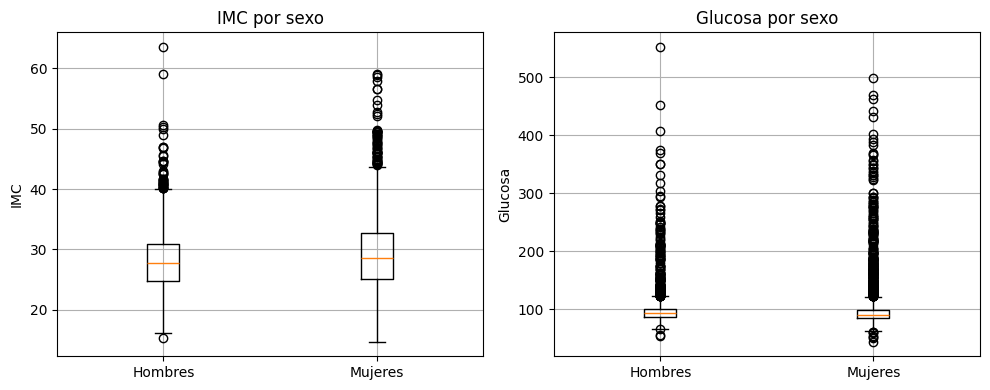

In [ ]:
# <CODE> 5. Graficar resultados
plt.figure(figsize=(10, 4))

for i, var in enumerate(['IMC', 'Glucosa']):
    hombres = ens[ens["Sexo"] == "HOMBRE"][var].dropna()
    mujeres = ens[ens["Sexo"] == "MUJER"][var].dropna()
    
    plt.subplot(1, 2, i + 1)
    plt.boxplot([hombres, mujeres], labels=["Hombres", "Mujeres"])
    plt.title(f"{var} por sexo")
    plt.ylabel(var)
    plt.grid(True)

plt.tight_layout()
plt.show()

## 4.3 Comparación entre grupos (Variables categóricas)
